In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns

In [2]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Normalize pixel values to between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Reshape data to fit CNN input shape (height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# Define simple CNN model
def create_simple_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [6]:
# Define LeNet-5 model
def create_lenet5():
    model = Sequential([
        # First convolutional layer
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    # First average pooling layer
    AveragePooling2D(pool_size=(2, 2)),
    # Second convolutional layer
    Conv2D(16, (5, 5), activation='relu'),
    # Second average pooling layer
    AveragePooling2D(pool_size=(2, 2)),
    # Flatten layer to feed into fully connected layers
    Flatten(),
    # Fully connected layer with 120 units
    Dense(120, activation='relu'),
    # Fully connected layer with 84 units
    Dense(84, activation='relu'),
    # Output layer with 10 units for softmax
    Dense(10, activation='softmax')
    ])
    return model

In [7]:
# Compile and train models
def train_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=32):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    return history

In [8]:
# Plot accuracy graph
def plot_accuracy(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7428 - loss: 0.7064 - val_accuracy: 0.8654 - val_loss: 0.3758
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8782 - loss: 0.3356 - val_accuracy: 0.8813 - val_loss: 0.3276
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8970 - loss: 0.2807 - val_accuracy: 0.8878 - val_loss: 0.3063
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9096 - loss: 0.2471 - val_accuracy: 0.9010 - val_loss: 0.2704
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9199 - loss: 0.2181 - val_accuracy: 0.9019 - val_loss: 0.2711
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9263 - loss: 0.1972 - val_accuracy: 0.9041 - val_loss: 0.2686
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9307 - loss: 0.1836 - val_accuracy: 0.9120 - val_loss: 0.2559
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9386 - loss: 0.1

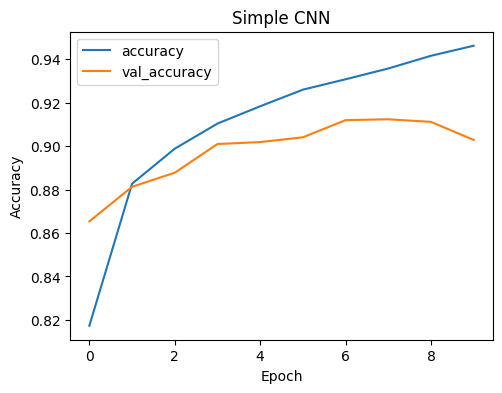

In [9]:
# Train simple CNN
simple_cnn = create_simple_cnn()
simple_cnn_history = train_model(simple_cnn, x_train, y_train, x_test, y_test)
simple_cnn_accuracy = simple_cnn.evaluate(x_test, y_test, verbose=0)[1]
print("Simple CNN Accuracy:", simple_cnn_accuracy)
plot_accuracy(simple_cnn_history, "Simple CNN")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5863 - loss: 2.7798 - val_accuracy: 0.8274 - val_loss: 1.0078
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6943 - loss: 1.8487 - val_accuracy: 0.8649 - val_loss: 0.8329
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7141 - loss: 1.6493 - val_accuracy: 0.8756 - val_loss: 0.9319
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7225 - loss: 1.5317 - val_accuracy: 0.8772 - val_loss: 1.0064
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7255 - loss: 1.4390 - val_accuracy: 0.8867 - val_loss: 0.7976
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7351 - loss: 1.3810 - val_accuracy: 0.8896 - val_loss: 1.0250
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7324 - loss: 1.3448 - val_accuracy: 0.8938 - val_loss: 0.9075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7411 - loss: 1.28

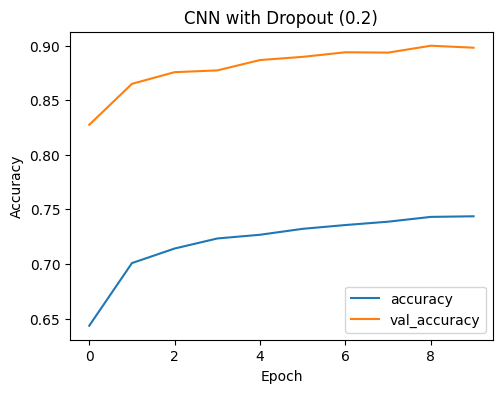

In [10]:
# Train CNN with dropout (dropout rate 0.2)
cnn_dropout_02 = create_simple_cnn()
cnn_dropout_02.add(Dropout(0.2))
cnn_dropout_02_history = train_model(cnn_dropout_02, x_train, y_train, x_test, y_test)
cnn_dropout_02_accuracy = cnn_dropout_02.evaluate(x_test, y_test, verbose=0)[1]
print("CNN with Dropout (0.2) Accuracy:", cnn_dropout_02_accuracy)
plot_accuracy(cnn_dropout_02_history, "CNN with Dropout (0.2)")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6532 - loss: 1.8212 - val_accuracy: 0.8546 - val_loss: 0.5602
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7842 - loss: 1.1906 - val_accuracy: 0.8683 - val_loss: 0.5979
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8037 - loss: 1.0611 - val_accuracy: 0.8846 - val_loss: 0.4872
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8123 - loss: 0.9807 - val_accuracy: 0.8870 - val_loss: 0.5278
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8183 - loss: 0.9462 - val_accuracy: 0.8973 - val_loss: 0.4536
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8255 - loss: 0.8859 - val_accuracy: 0.8914 - val_loss: 0.5097
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8280 - loss: 0.8500 - val_accuracy: 0.8889 - val_loss: 0.5857
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8307 - loss: 0.865

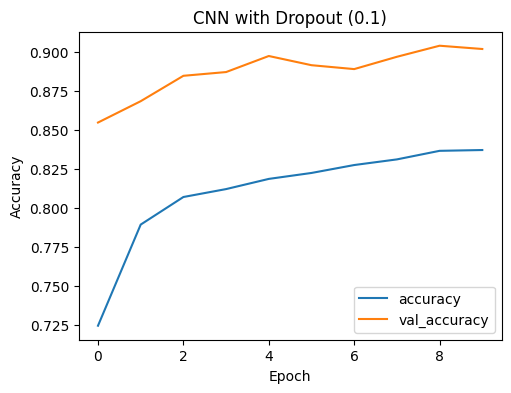

In [11]:
# Train CNN with dropout (dropout rate 0.1)
cnn_dropout_01 = create_simple_cnn()
cnn_dropout_01.add(Dropout(0.1))
cnn_dropout_01_history = train_model(cnn_dropout_01, x_train, y_train, x_test, y_test)
cnn_dropout_01_accuracy = cnn_dropout_01.evaluate(x_test, y_test, verbose=0)[1]
print("CNN with Dropout (0.1) Accuracy:", cnn_dropout_01_accuracy)
plot_accuracy(cnn_dropout_01_history, "CNN with Dropout (0.1)")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7124 - loss: 0.7870 - val_accuracy: 0.8365 - val_loss: 0.4620
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8479 - loss: 0.4199 - val_accuracy: 0.8543 - val_loss: 0.4004
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8668 - loss: 0.3605 - val_accuracy: 0.8634 - val_loss: 0.3679
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8796 - loss: 0.3224 - val_accuracy: 0.8800 - val_loss: 0.3287
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8882 - loss: 0.3020 - val_accuracy: 0.8791 - val_loss: 0.3286
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8970 - loss: 0.2800 - val_accuracy: 0.8850 - val_loss: 0.3064
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9035 - loss: 0.2643 - val_accuracy: 0.8892 - val_loss: 0.3039
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9052 - loss: 0.2513 - 

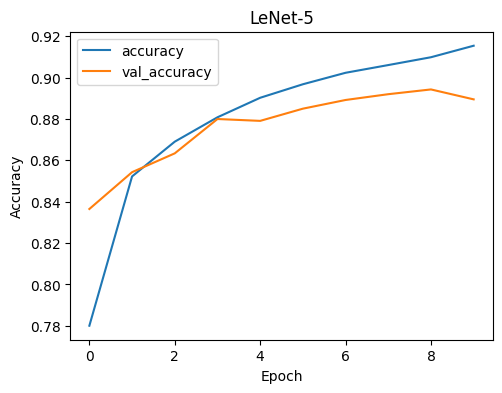

In [13]:
# Train LeNet-5
lenet5 = create_lenet5()
lenet5_history = train_model(lenet5, x_train, y_train, x_test, y_test)
lenet5_accuracy = lenet5.evaluate(x_test, y_test, verbose=0)[1]
print("LeNet-5 Accuracy:", lenet5_accuracy)
plot_accuracy(lenet5_history, "LeNet-5")

In [14]:
# Confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [15]:
# Predictions
simple_cnn_probabilities = simple_cnn.predict(x_test)
simple_cnn_predictions = np.argmax(simple_cnn_probabilities, axis=1)

cnn_dropout_02_probabilities = cnn_dropout_02.predict(x_test)
cnn_dropout_02_predictions = np.argmax(cnn_dropout_02_probabilities, axis=1)

cnn_dropout_01_probabilities = cnn_dropout_01.predict(x_test)
cnn_dropout_01_predictions = np.argmax(cnn_dropout_01_probabilities, axis=1)

lenet5_probabilities = lenet5.predict(x_test)
lenet5_predictions = np.argmax(lenet5_probabilities, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


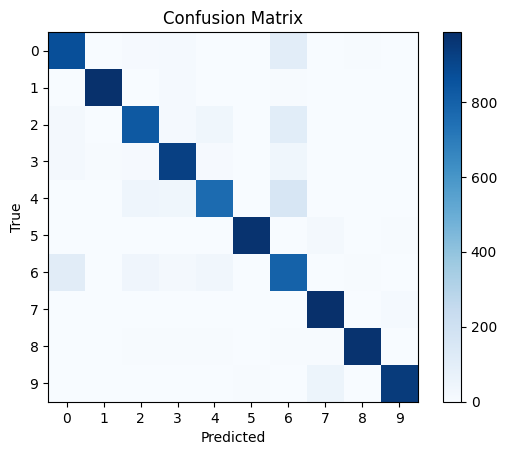

Classification Report for Simple CNN:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.83      0.86      1000
           3       0.90      0.92      0.91      1000
           4       0.90      0.76      0.83      1000
           5       0.99      0.97      0.98      1000
           6       0.66      0.80      0.72      1000
           7       0.92      0.99      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [16]:
# Confusion matrix for simple CNN
plot_confusion_matrix(y_test, simple_cnn_predictions)
print("Classification Report for Simple CNN:")
print(classification_report(y_test, simple_cnn_predictions))

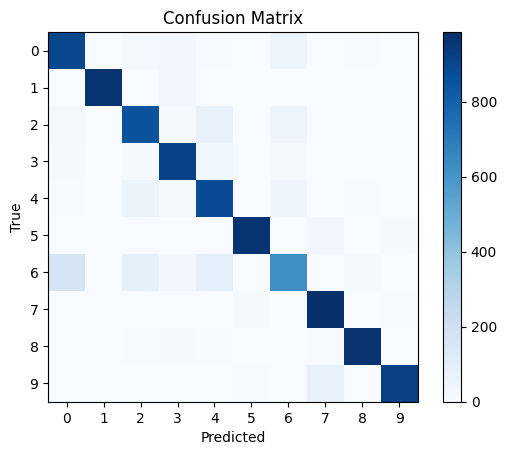

Classification Report for CNN with Dropout (0.2):
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.83      0.85      0.84      1000
           3       0.89      0.92      0.91      1000
           4       0.81      0.88      0.84      1000
           5       0.98      0.96      0.97      1000
           6       0.80      0.62      0.70      1000
           7       0.91      0.98      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [17]:
# Confusion matrix for CNN with dropout (dropout rate 0.2)
plot_confusion_matrix(y_test, cnn_dropout_02_predictions)
print("Classification Report for CNN with Dropout (0.2):")
print(classification_report(y_test, cnn_dropout_02_predictions))


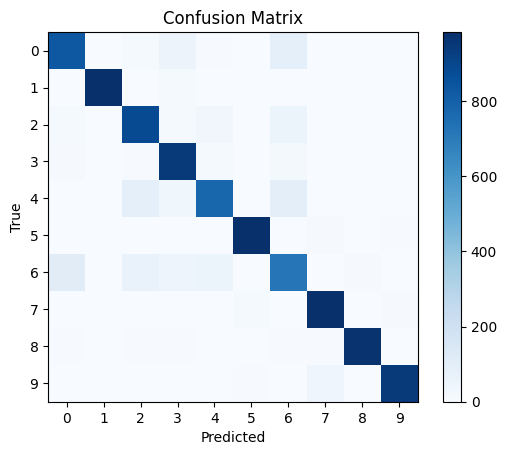

Classification Report for CNN with Dropout (0.1):
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.83      0.88      0.86      1000
           3       0.85      0.95      0.89      1000
           4       0.88      0.78      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.71      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [18]:
# Confusion matrix for CNN with dropout (dropout rate 0.1)
plot_confusion_matrix(y_test, cnn_dropout_01_predictions)
print("Classification Report for CNN with Dropout (0.1):")
print(classification_report(y_test, cnn_dropout_01_predictions))

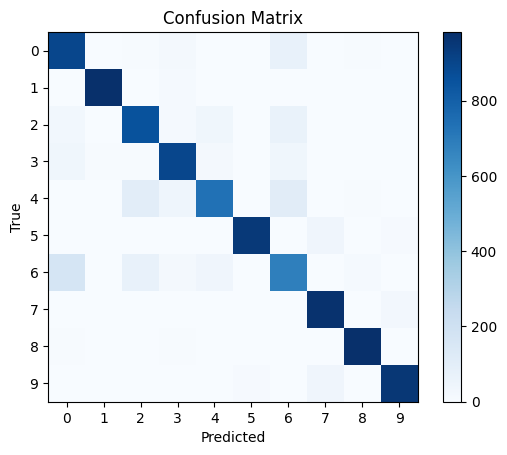

Classification Report for LeNet-5:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.85      0.84      1000
           3       0.89      0.90      0.89      1000
           4       0.88      0.74      0.80      1000
           5       0.99      0.95      0.97      1000
           6       0.70      0.68      0.69      1000
           7       0.92      0.97      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [19]:
# Confusion matrix for LeNet-5
plot_confusion_matrix(y_test, lenet5_predictions)
print("Classification Report for LeNet-5:")
print(classification_report(y_test, lenet5_predictions))

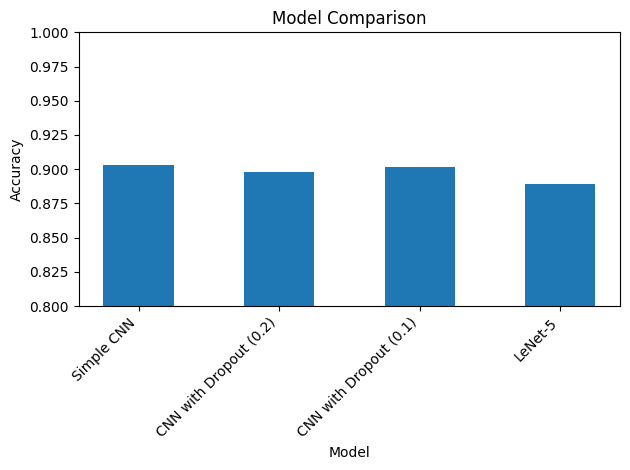

In [20]:
# Bar graph for model comparison
accuracies = [simple_cnn_accuracy, cnn_dropout_02_accuracy, cnn_dropout_01_accuracy, lenet5_accuracy]
models = ['Simple CNN', 'CNN with Dropout (0.2)', 'CNN with Dropout (0.1)', 'LeNet-5']

# Adjust bar width and add space between model names
bar_width = 0.5
bar_positions = np.arange(len(models))

plt.bar(bar_positions, accuracies, width=bar_width, align='center')
plt.xticks(bar_positions, models, rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
